In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '11f3b835-0ab2-453f-9cea-cc87c0b80b84',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2022-07-25T20:50:33.142Z', 'error_code': 0, 'error_message': None, 'elapsed': 43, 'credit_count': 1, 'notice': None, 'total_count': 9932}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9636, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option("display.max_columns",None)

In [4]:
pd.json_normalize(data["status"])



,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2022-07-25T20:50:33.142Z,0,None,43,1,None,9932


In [5]:
df = pd.json_normalize(data["data"])
# So we can see the time of each API puLL
df["timestamp"] = pd.to_datetime("now")
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9636,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.910323e+07,1.910323e+07,NaN,1,NaN,NaN,None,2022-07-25T20:50:00.000Z,22140.631411,3.126160e+10,40.4025,1.966772,-2.741462,2.751131,4.317381,-24.933582,-41.871518,4.229576e+11,41.7209,4.649533e+11,None,2022-07-25T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-25 20:50:47.413608
1,1027,Ethereum,ETH,ethereum,5847,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.216959e+08,1.216959e+08,NaN,2,NaN,NaN,None,2022-07-25T20:49:00.000Z,1524.553945,2.099034e+10,35.7633,3.412060,-5.426387,3.445609,26.197627,-16.736911,-46.039733,1.855319e+11,18.3207,1.855319e+11,None,2022-07-25T20:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-25 20:50:47.413608
2,825,Tether,USDT,tether,36639,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.584628e+10,6.816698e+10,NaN,3,NaN,NaN,None,2022-07-25T20:49:00.000Z,1.000047,5.243855e+10,31.9978,0.002167,0.001773,0.022151,0.049075,0.094835,-0.011851,6.584937e+10,6.4954,6.817018e+10,None,2022-07-25T20:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-25 20:50:47.413608
3,3408,USD Coin,USDC,usd-coin,4946,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.499299e+10,5.499299e+10,NaN,4,NaN,NaN,None,2022-07-25T20:49:00.000Z,1.000090,6.438248e+09,35.4257,0.008688,-0.023676,0.024721,0.001596,-0.020309,0.056358,5.499795e+10,5.4294,5.499795e+10,None,2022-07-25T20:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-25 20:50:47.413608
4,1839,BNB,BNB,bnb,1026,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-07-25T20:49:00.000Z,254.162569,1.007589e+09,14.3656,1.163077,-3.414515,-0.963218,7.424700,-18.184814,-33.922056,4.100589e+10,4.0481,5.083251e+10,None,2022-07-25T20:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-25 20:50:47.413608


## Create a function to automate API pull

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '11f3b835-0ab2-453f-9cea-cc87c0b80b84',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
  
    # Appending to a dataframe
    #df2 = pd.json_normalize(data["data"])
    # So we can see the time of each API puLL
    #df2["timestamp"] = pd.to_datetime("now")
    # Append to original dataframe
    #df = df.append(df2)
    # Append file to a CSV
   
    # Append file to a CSV
    df = pd.json_normalize(data["data"])
    df["timestamp"] = pd.to_datetime("now")
    df = df.append(df)
    # Will check if there is a file under this name
    if not os.path.isfile(r'C:\Users\user\Desktop\API folder\API.csv'):
        # It will create column headers based off dataframe
        df.to_csv(r'C:\Users\user\Desktop\API folder\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\user\Desktop\API folder\API.csv', mode='a',header=False)

In [7]:
# Give us ability to track time 
import os
from time import time
from time import sleep

# Below max of API per day pull limit 
for i in range(30):
    api_runner()
    print("API pull completed succesfully")
    # Will run function and then wait for 30 seconds before running again
    sleep(60)
#exit()



API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully
API pull completed succesfully


In [8]:
pd.set_option("display.max_columns",None)
df.head()


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9636,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.910323e+07,1.910323e+07,NaN,1,NaN,NaN,None,2022-07-25T21:19:00.000Z,22126.929561,3.243938e+10,45.5759,-0.137196,-2.781556,2.439390,3.423445,-25.201083,-42.286191,4.226958e+11,41.7916,4.646655e+11,None,2022-07-25T21:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-25 21:20:37.750236
1,1027,Ethereum,ETH,ethereum,5847,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.216959e+08,1.216959e+08,NaN,2,NaN,NaN,None,2022-07-25T21:18:00.000Z,1521.904794,2.106726e+10,35.7272,0.069003,-5.851709,2.944868,24.745032,-17.287007,-46.479085,1.852095e+11,18.3266,1.852095e+11,None,2022-07-25T21:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-25 21:20:37.750236
2,825,Tether,USDT,tether,36639,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.584628e+10,6.816698e+10,NaN,3,NaN,NaN,None,2022-07-25T21:18:00.000Z,1.000054,5.347317e+10,34.6899,0.000722,0.001366,0.022743,0.046300,0.100292,-0.008451,6.584983e+10,6.5105,6.817065e+10,None,2022-07-25T21:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-25 21:20:37.750236
3,3408,USD Coin,USDC,usd-coin,4946,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.499299e+10,5.499299e+10,NaN,4,NaN,NaN,None,2022-07-25T21:18:00.000Z,1.000076,6.443472e+09,36.4442,-0.010091,-0.007461,0.019977,-0.001541,-0.013325,0.030748,5.499717e+10,5.4412,5.499717e+10,None,2022-07-25T21:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-25 21:20:37.750236
4,1839,BNB,BNB,bnb,1026,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-07-25T21:18:00.000Z,254.155191,1.012961e+09,15.1909,-0.122262,-3.483916,-1.255196,6.771873,-18.456716,-34.230169,4.100470e+10,4.0568,5.083104e+10,None,2022-07-25T21:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-25 21:20:37.750236


In [9]:
# Check file location by reading 
df30 = pd.read_csv(r'C:\Users\user\Desktop\API folder\API.csv')

In [10]:
# Remove scientific notation
pd.set_option("display.float_format", lambda x: "%.5f" %x)

In [11]:
df30.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9618,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19088387.00000,19088387.00000,NaN,1,NaN,NaN,NaN,2022-07-08T13:48:00.000Z,21423.96383,32520651533.89708,52.36600,0.50659,4.55358,9.93127,-29.80269,-35.19457,-49.60802,408948912685.17950,43.17090,449903240456.54999,NaN,2022-07-08T13:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-08 13:50:54.664308
1,1,1027,Ethereum,ETH,ethereum,5816,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,121461646.49900,121461646.49900,NaN,2,NaN,NaN,NaN,2022-07-08T13:47:00.000Z,1215.88755,17441600553.52747,35.29690,0.40603,1.92438,14.47255,-33.01277,-49.79686,-62.30568,147683703839.57428,15.60300,147683703839.57001,NaN,2022-07-08T13:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-08 13:50:54.664308
2,2,825,Tether,USDT,tether,35900,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,65992280060.75488,68160365339.13867,NaN,3,NaN,NaN,NaN,2022-07-08T13:47:00.000Z,0.99940,51312418610.31824,38.83620,-0.00013,0.02095,0.03545,-0.00214,-0.05994,-0.08604,65953000810.16773,6.96240,68119795622.99000,NaN,2022-07-08T13:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-08 13:50:54.664308
3,3,3408,USD Coin,USDC,usd-coin,4786,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,55546939563.00000,55546939563.00000,NaN,4,NaN,NaN,NaN,2022-07-08T13:47:00.000Z,0.99999,6274816120.11462,27.41230,0.01966,-0.00853,-0.03253,-0.00662,-0.01683,0.00586,55546574741.82689,5.86380,55546574741.83000,NaN,2022-07-08T13:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-08 13:50:54.664308
4,4,1839,BNB,BNB,bnb,998,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,NaN,2022-07-08T13:47:00.000Z,239.54247,1382211429.95948,41.21180,0.77548,1.03250,9.98249,-18.02329,-28.40245,-43.95728,39111769595.55737,4.12840,39552476325.09000,NaN,2022-07-08T13:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-08 13:50:54.664308


In [12]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9636,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19103231.00000,19103231.00000,NaN,1,NaN,NaN,None,2022-07-25T21:19:00.000Z,22126.92956,32439379584.63689,45.57590,-0.13720,-2.78156,2.43939,3.42344,-25.20108,-42.28619,422695846722.23041,41.79160,464665520778.48999,None,2022-07-25T21:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-25 21:20:37.750236
1,1027,Ethereum,ETH,ethereum,5847,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121695875.74900,121695875.74900,NaN,2,NaN,NaN,None,2022-07-25T21:18:00.000Z,1521.90479,21067255679.09382,35.72720,0.06900,-5.85171,2.94487,24.74503,-17.28701,-46.47909,185209536731.36816,18.32660,185209536731.37000,None,2022-07-25T21:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-25 21:20:37.750236
2,825,Tether,USDT,tether,36639,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65846277709.51898,68166976391.71130,NaN,3,NaN,NaN,None,2022-07-25T21:18:00.000Z,1.00005,53473167613.95276,34.68990,0.00072,0.00137,0.02274,0.04630,0.10029,-0.00845,65849828875.39665,6.51050,68170652715.55000,None,2022-07-25T21:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-25 21:20:37.750236
3,3408,USD Coin,USDC,usd-coin,4946,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,54992987378.64125,54992987378.64125,NaN,4,NaN,NaN,None,2022-07-25T21:18:00.000Z,1.00008,6443472280.10317,36.44420,-0.01009,-0.00746,0.01998,-0.00154,-0.01333,0.03075,54997172500.34203,5.44120,54997172500.34000,None,2022-07-25T21:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-25 21:20:37.750236
4,1839,BNB,BNB,bnb,1026,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-07-25T21:18:00.000Z,254.15519,1012961351.59093,15.19090,-0.12226,-3.48392,-1.25520,6.77187,-18.45672,-34.23017,41004702381.18704,4.05680,50831038167.08000,None,2022-07-25T21:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-25 21:20:37.750236


In [13]:
# Average the amount for each cryptocurrency
df3 = df.groupby("name", sort = False)[["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d", "quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"]].mean()
df3.head()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.13720,-2.78156,2.43939,3.42344,-25.20108,-42.28619
Ethereum,0.06900,-5.85171,2.94487,24.74503,-17.28701,-46.47909
Tether,0.00072,0.00137,0.02274,0.04630,0.10029,-0.00845
USD Coin,-0.01009,-0.00746,0.01998,-0.00154,-0.01333,0.03075
BNB,-0.12226,-3.48392,-1.25520,6.77187,-18.45672,-34.23017


In [14]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.13720
           quote.USD.percent_change_24h    -2.78156
           quote.USD.percent_change_7d      2.43939
           quote.USD.percent_change_30d     3.42344
           quote.USD.percent_change_60d   -25.20108
                                             ...   
Shiba Inu  quote.USD.percent_change_24h    -5.02904
           quote.USD.percent_change_7d     -3.32442
           quote.USD.percent_change_30d    -5.83046
           quote.USD.percent_change_60d     3.23717
           quote.USD.percent_change_90d   -52.07938
Length: 90, dtype: float64

In [15]:
type(df3)

pandas.core.frame.DataFrame

In [16]:
type(df4)

pandas.core.series.Series

In [17]:
# Turn it back into a dataframe
df5 = df4.to_frame(name="Values")
df5.head()

Values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.13720
        quote.USD.percent_change_24h  -2.78156
        quote.USD.percent_change_7d    2.43939
        quote.USD.percent_change_30d   3.42344
        quote.USD.percent_change_60d -25.20108

In [18]:
#len(df5)

In [19]:
#index = pd.Index(range(len(df5)))

In [20]:
# Reset the index 
df6 = df5.reset_index()
df6.head()

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.13720
1,Bitcoin,quote.USD.percent_change_24h,-2.78156
2,Bitcoin,quote.USD.percent_change_7d,2.43939
3,Bitcoin,quote.USD.percent_change_30d,3.42344
4,Bitcoin,quote.USD.percent_change_60d,-25.20108


In [21]:
# Rename column
df7 = df6.rename(columns={"level_1":"percent_change"})
df7.head()

,name,percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.13720
1,Bitcoin,quote.USD.percent_change_24h,-2.78156
2,Bitcoin,quote.USD.percent_change_7d,2.43939
3,Bitcoin,quote.USD.percent_change_30d,3.42344
4,Bitcoin,quote.USD.percent_change_60d,-25.20108


In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt

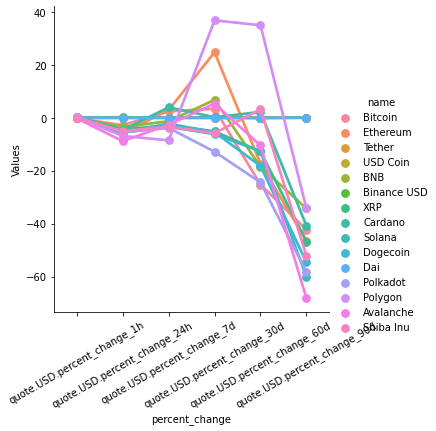

In [23]:
g = sns.catplot(x="percent_change",y="Values",hue="name",data=df7,kind="point")

# Set rotation for better viewing 
g.set_xticklabels(rotation=30)


In [24]:
df7["percent_change"] = df7["percent_change"].replace(["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d", "quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"],["1h","24h","7d","30d","60d","90d"])
df7.head()

,name,percent_change,Values
0,Bitcoin,1h,-0.13720
1,Bitcoin,24h,-2.78156
2,Bitcoin,7d,2.43939
3,Bitcoin,30d,3.42344
4,Bitcoin,60d,-25.20108


In [25]:
df10 = df[["name","quote.USD.price","timestamp"]]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,22126.92956,2022-07-25 21:20:37.750236
1,Ethereum,1521.90479,2022-07-25 21:20:37.750236
2,Tether,1.00005,2022-07-25 21:20:37.750236
3,USD Coin,1.00008,2022-07-25 21:20:37.750236
4,BNB,254.15519,2022-07-25 21:20:37.750236
5,Binance USD,1.00141,2022-07-25 21:20:37.750236
6,XRP,0.34714,2022-07-25 21:20:37.750236
7,Cardano,0.49472,2022-07-25 21:20:37.750236
8,Solana,38.85986,2022-07-25 21:20:37.750236
9,Dogecoin,0.06459,2022-07-25 21:20:37.750236


In [26]:
df10 = df[["name","quote.USD.price","timestamp"]]
df10 = df10.query("name == 'Bitcoin'")
df10.head()

,name,quote.USD.price,timestamp
0,Bitcoin,22126.92956,2022-07-25 21:20:37.750236
0,Bitcoin,22126.92956,2022-07-25 21:20:37.750236


In [28]:
#sns.set_theme(style="darkgrid")
#sns.lineplot(x="timestamp", y="quote.USD.price", data=df10)